# Analysis of the primary results of the 2016 US election

<hr/>

In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython import display

In [86]:
df = pd.read_csv("./primary_results.csv")

In [4]:
pd.Series(df.columns)

0                 state
1    state_abbreviation
2                county
3                  fips
4                 party
5             candidate
6                 votes
7        fraction_votes
dtype: object

In [88]:
df = df.drop(columns=["state_abbreviation", "fips", "fraction_votes"])

In [89]:
pd.Series(df.columns)

0        state
1       county
2        party
3    candidate
4        votes
dtype: object

In [172]:
df.info()

for i in ["party", "candidate", "county", "state"]:
    df[i] = df[i].astype("category")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24611 entries, 0 to 24610
Data columns (total 5 columns):
state        24611 non-null category
county       24611 non-null category
party        24611 non-null category
candidate    24611 non-null category
votes        24611 non-null int64
dtypes: category(4), int64(1)
memory usage: 415.6 KB


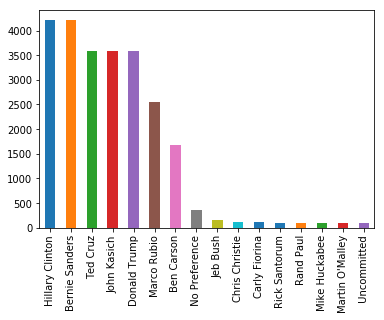

In [173]:
df.candidate.value_counts().plot.bar()
plt.show()

In [35]:
df[["candidate", "votes"]].groupby("candidate").sum().sort_values(by="votes", ascending=False)

,votes
candidate,
Hillary Clinton,15692452
Donald Trump,13302541
Bernie Sanders,11959102
Ted Cruz,7603006
John Kasich,4159949
Marco Rubio,3321076
Ben Carson,564553
Jeb Bush,94411
Chris Christie,24353


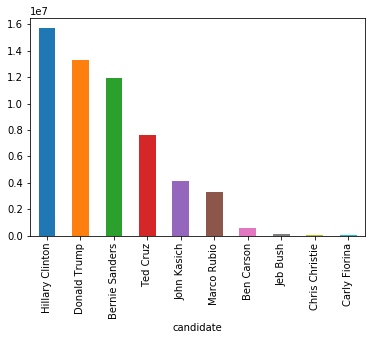

In [145]:
df[["candidate", "votes"]].groupby("candidate").sum().sort_values(by="votes", ascending=False).votes.head(10).plot.bar()
plt.show()

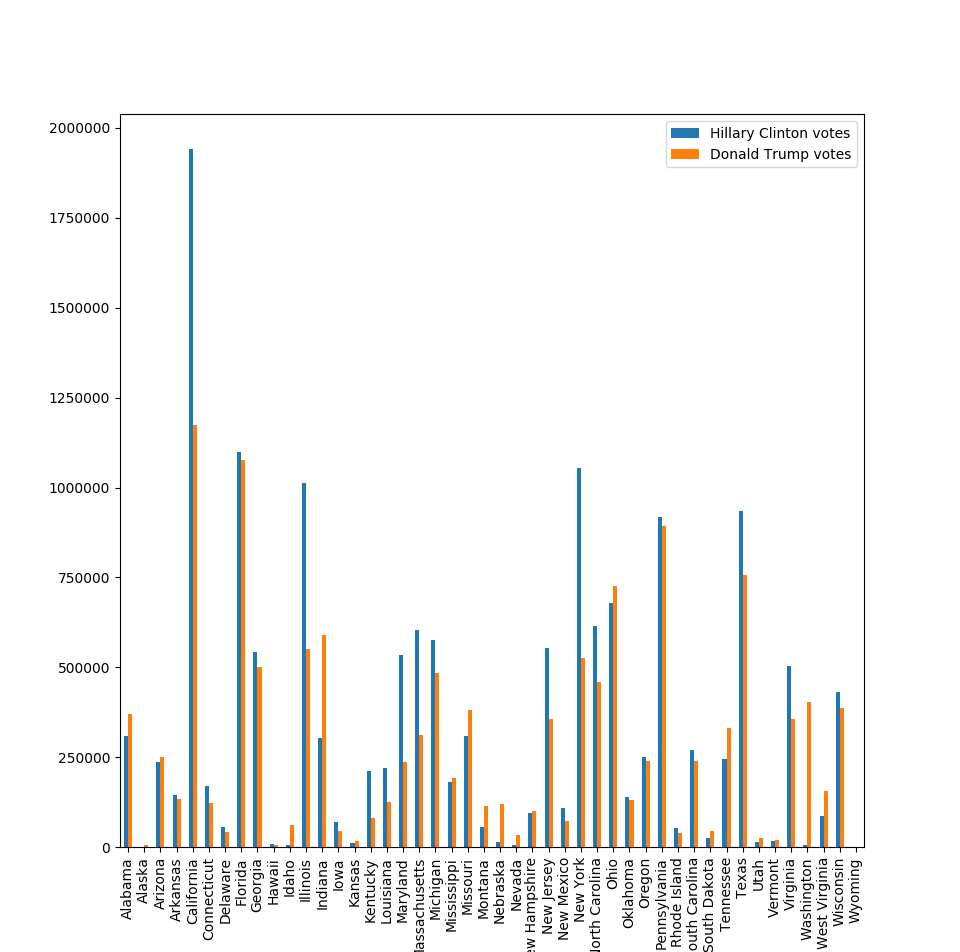

In [146]:
# I did this in the ipython console, just importing the image here
display.Image("./trump_vs_hilary_by_state.png")

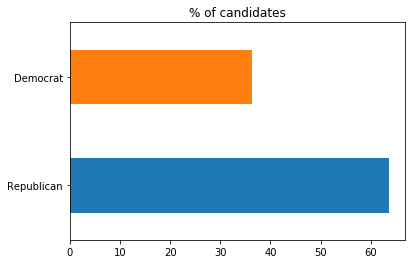

Republican    15652
Democrat       8959
Name: party, dtype: int64

In [123]:
x = df.party.value_counts()
total_candidates = x.sum()
x.apply(lambda x: x / total_candidates * 100).plot.barh(title="% of candidates")
plt.show()
x

In [168]:
def candidates_by_party(party: str = "Republican", no_candidates: int = 5):
    # select columns
    x = df[["party", "candidate", "votes"]]

    # filter by passed value (party)
    x = x[df.party == party]
    
    # select columns
    x = x[["candidate", "votes"]]
    
    # group candidates by votes
    x = x.groupby("candidate").sum()
    
    # sort
    x = x.sort_values("votes", ascending=False)
    
    # drop insignificant
    x = x.where(lambda y: y > 10000).dropna()
    
    # select the highest
    x = x.votes.head(no_candidates)
    
    # plot vertically
    x.plot.barh(title=f"{party.title()} candidates")
    plt.show()
    
    display.display_pretty(x)

## Republicans

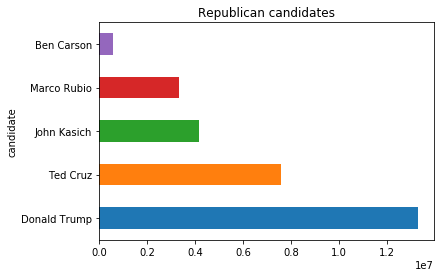

candidate
Donald Trump    13302541.0
Ted Cruz         7603006.0
John Kasich      4159949.0
Marco Rubio      3321076.0
Ben Carson        564553.0
Name: votes, dtype: float64

In [170]:
candidates_by_party("Republican")

## Democrats

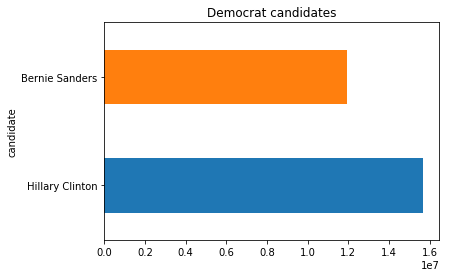

candidate
Hillary Clinton    15692452.0
Bernie Sanders     11959102.0
Name: votes, dtype: float64

In [171]:
candidates_by_party("Democrat")